In [1]:
# Install necessary libraries (only if needed)
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load dataset
dataset = load_dataset('lukebarousse/data_jobs')

# Convert dataset to Pandas DataFrame
df = dataset['train'].to_pandas()

# Check if 'job_posted_date' exists
if 'job_posted_date' in df.columns:
    df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Ensure 'job_skills' exists and convert it properly
if 'job_skills' in df.columns:
    df['job_skills'] = df['job_skills'].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) and pd.notna(x) else x
    )

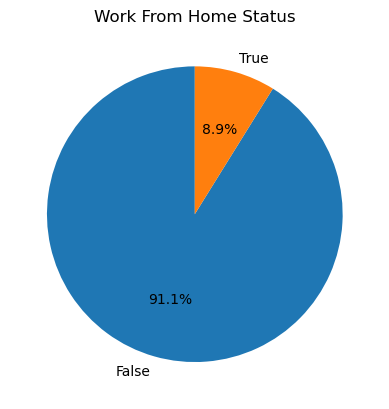

In [5]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90,autopct='%1.1f%%' # Ensures percentage display
)

plt.title('Work From Home Status')  # Correct title case
plt.ylabel("")  # Removes y-axis label
plt.show()

In [6]:
df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


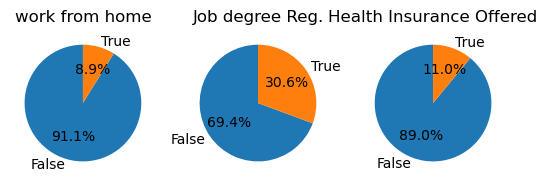

In [13]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'work from home',
    'job_no_degree_mention': 'Job degree Reg.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),startangle=90,autopct='%1.1f%%',labels=['False', 'True']
)
    ax[i].set_title(title)

plt.show()